In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = datasets.load_iris()

X, y = iris.data, iris.target

In [3]:
y_named = np.array(['blue', 'red', 'green', 'purple'])[y]

# Информация о данных

## Размеры и общая информация

In [4]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
pd.DataFrame(y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [7]:
pd.DataFrame(y).describe()

,0
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


Визуализация данных

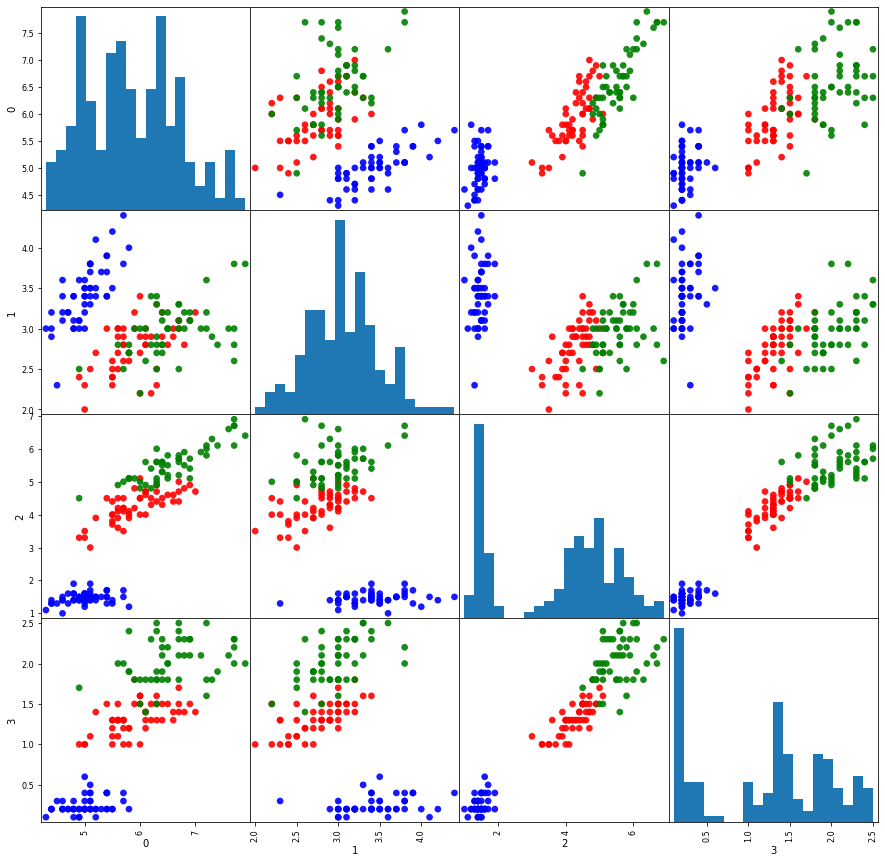

In [8]:
import matplotlib.pyplot as plt
from pandas import plotting
plotting.scatter_matrix(pd.DataFrame(X), c = y_named, figsize = (15, 15), marker = '0', hist_kwds = {'bins': 20}, s = 45, alpha = .9);

## Количество признаков

Кол-во уникальных меток

In [9]:
set(y)

{0, 1, 2}

Кол-во меток класса

In [10]:
from collections import Counter

Counter(y)

Counter({0: 50, 1: 50, 2: 50})

# Предобработка данных

## Нормализация данных

In [11]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Так как различия между минимальным и максимальным значениями в данных несущественны, то можно смело сказать, что нормализация данных нам не нужна.

# Создание обучающей и тестовой выборок

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, train_size=0.75, random_state=1)
print('Х - ',X_train.shape, X_test.shape)
print('y_named - ', y_train_named.shape, y_test_named.shape)
print('y - ', y_train.shape, y_test.shape)

Х -  (112, 4) (38, 4)
y_named -  (112,) (38,)
y -  (112,) (38,)


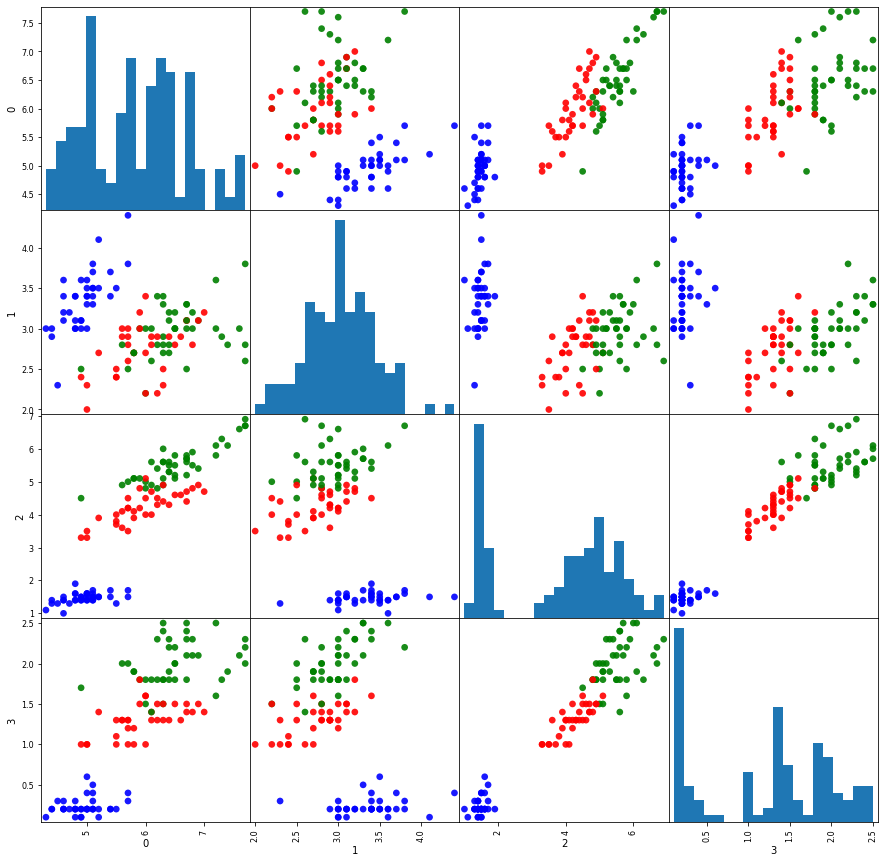

In [13]:
plotting.scatter_matrix(pd.DataFrame(X_train), c = y_train_named, figsize = (15, 15), marker = '0', hist_kwds = {'bins': 20}, s = 45, alpha = .9);

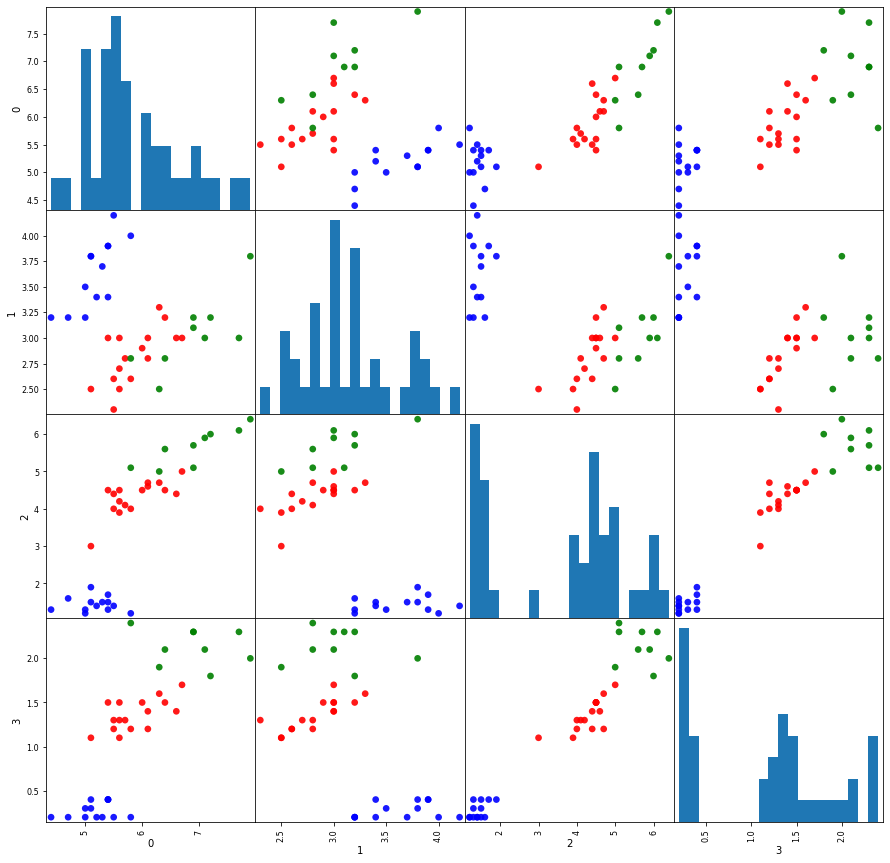

In [14]:
plotting.scatter_matrix(pd.DataFrame(X_test), c = y_test_named, figsize = (15, 15), marker = '0', hist_kwds = {'bins': 20}, s = 45, alpha = .9);

## Создание результирующей таблицы

In [15]:
t_1, t_2, t_3 = pd.DataFrame(X_test), pd.DataFrame(y_test), pd.DataFrame(y_test_named)
rezult_table = pd.concat([t_3], axis=1)
rezult_table

,0
0,blue
1,red
2,red
3,blue
4,green
5,red
6,green
7,blue
8,blue
9,green


# Градиентный бустинг
## predict

In [16]:
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
X_gb_predict = gbrt.predict(X_test)

In [17]:
gb_named_3 = np.array(['blue', 'red', 'green', 'purple'])[X_gb_predict]
gb_named_3

array(['blue', 'red', 'red', 'blue', 'green', 'red', 'green', 'blue',
       'blue', 'green', 'red', 'blue', 'green', 'red', 'red', 'blue',
       'red', 'red', 'blue', 'blue', 'red', 'red', 'green', 'blue',
       'green', 'red', 'blue', 'blue', 'red', 'green', 'red', 'green',
       'red', 'green', 'green', 'blue', 'red', 'blue'], dtype='<U6')

In [18]:
from sklearn.metrics import accuracy_score
print('Точность предсказания:', round(accuracy_score(y_test_named, gb_named_3)*100, 2), '%')

Точность предсказания: 97.37 %


In [19]:
pred_list = np.hstack((y_test_named.reshape(-1,1), gb_named_3.reshape(-1,1)))
pred_list

array([['blue', 'blue'],
       ['red', 'red'],
       ['red', 'red'],
       ['blue', 'blue'],
       ['green', 'green'],
       ['red', 'red'],
       ['green', 'green'],
       ['blue', 'blue'],
       ['blue', 'blue'],
       ['green', 'green'],
       ['red', 'red'],
       ['blue', 'blue'],
       ['green', 'green'],
       ['red', 'red'],
       ['red', 'red'],
       ['blue', 'blue'],
       ['red', 'red'],
       ['red', 'red'],
       ['blue', 'blue'],
       ['blue', 'blue'],
       ['red', 'red'],
       ['red', 'red'],
       ['red', 'green'],
       ['blue', 'blue'],
       ['green', 'green'],
       ['red', 'red'],
       ['blue', 'blue'],
       ['blue', 'blue'],
       ['red', 'red'],
       ['green', 'green'],
       ['red', 'red'],
       ['green', 'green'],
       ['red', 'red'],
       ['green', 'green'],
       ['green', 'green'],
       ['blue', 'blue'],
       ['red', 'red'],
       ['blue', 'blue']], dtype='<U6')

In [20]:
rezult_table = pd.concat([rezult_table, pd.DataFrame(gb_named_3.reshape(-1,1))], axis=1)

rezult_table

,0,0
0,blue,blue
1,red,red
2,red,red
3,blue,blue
4,green,green
5,red,red
6,green,green
7,blue,blue
8,blue,blue
9,green,green


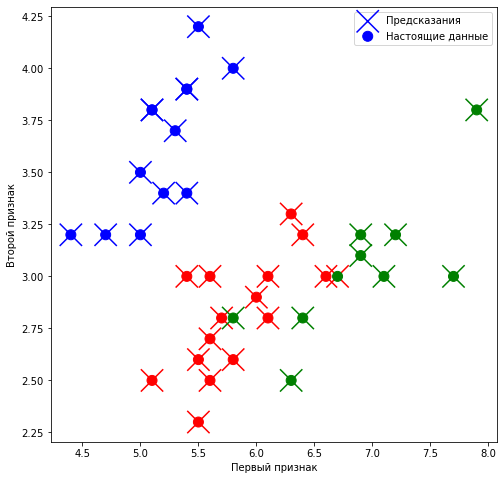

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_named, marker='x', s=500, label='Предсказания')
plt.scatter(X_test[:, 0], X_test[:, 1], c=gb_named_3, marker='o', s=100, label='Настоящие данные')
plt.legend()
plt.xlabel("Первый признак")
plt.ylabel("Второй признак");

## decision_function

In [22]:
gbrt = GradientBoostingClassifier().fit(X_train, y_train_named)
X_gb = gbrt.decision_function(X_test)

In [23]:
# функция decision_function неудобна: выводит какието числа, веса (если отрцат. - вес класса 0=blue, если положит. - вес класса 1=red)
#Диапазон значений может быть произвольным, и абсолютное значение – малоинформативно
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)))

Решающая функция:
[[ 6.24967227 -7.06115488 -5.84218419]
 [-8.02968458 -7.06569883  3.33242815]
 [-8.02904043 -7.06569883  3.2524582 ]
 [ 6.24967227 -7.06115488 -5.84218419]
 [-8.00991944  6.21818478 -7.90226388]
 [-8.05025628 -8.0780097   5.27875805]
 [-8.00947399  5.83531597 -5.26961602]
 [ 6.24967227 -7.06115488 -5.84218419]
 [ 6.24967227 -7.06115488 -5.84218419]
 [-8.00991944  5.83499752 -5.23873446]
 [-8.02968458 -7.06569883  3.33242815]
 [ 6.24967227 -7.06115488 -5.84218419]
 [-8.00945803  5.83529612 -7.89832864]
 [-8.04923492 -7.06569883  4.29995921]
 [-8.02972589 -7.06569883  3.2524582 ]
 [ 6.24967227 -7.06115488 -5.84218419]
 [-8.02968458 -7.06569883  3.33242815]
 [-8.02968458 -7.06569883  3.2524582 ]
 [ 6.24967227 -7.06115488 -5.84218419]
 [ 6.24967227 -7.06115488 -5.84218419]
 [-8.02968458 -7.06569883  3.33242815]
 [-8.02968458 -7.06569883  3.2524582 ]
 [-8.01132271  5.83765302 -7.31339735]
 [ 6.24967227 -7.06115488 -5.84218419]
 [-8.03187847  6.21818478 -7.90226388]
 [-8.02

In [24]:
rezult_table = pd.concat([rezult_table, pd.DataFrame(gbrt.decision_function(X_test))], axis=1)

rezult_table

,0,0,0,1,2
0,blue,blue,6.249672,-7.061155,-5.842184
1,red,red,-8.029685,-7.065699,3.332428
2,red,red,-8.029040,-7.065699,3.252458
3,blue,blue,6.249672,-7.061155,-5.842184
4,green,green,-8.009919,6.218185,-7.902264
5,red,red,-8.050256,-8.078010,5.278758
6,green,green,-8.009474,5.835316,-5.269616
7,blue,blue,6.249672,-7.061155,-5.842184
8,blue,blue,6.249672,-7.061155,-5.842184
9,green,green,-8.009919,5.834998,-5.238734


## predict_proba

In [25]:
Gb_pred = gbrt.predict_proba(X_test)
pd.DataFrame(Gb_pred).describe()

,0,1,2
count,3.800000e+01,38.000000,3.800000e+01
mean,3.421075e-01,0.263167,3.947254e-01
std,4.807760e-01,0.446247,4.953325e-01
min,6.475534e-07,0.000002,6.552363e-07
25%,2.930518e-06,0.000002,5.604932e-06
50%,1.259502e-05,0.000030,5.604932e-06
75%,9.999927e-01,0.749973,9.999544e-01
max,9.999927e-01,0.999999,9.999968e-01


In [26]:
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test)))

Спрогнозированные вероятности:
[[9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [1.16272993e-05 3.04882530e-05 9.99957884e-01]
 [1.26033960e-05 3.30264217e-05 9.99954370e-01]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [6.61930267e-07 9.99998601e-01 7.37167971e-07]
 [1.62660174e-06 1.58207868e-06 9.99996791e-01]
 [9.71129535e-07 9.99983991e-01 1.50377328e-05]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [9.71005746e-07 9.99983515e-01 1.55142987e-05]
 [1.16272993e-05 3.04882530e-05 9.99957884e-01]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [9.71177863e-07 9.99997943e-01 1.08532962e-06]
 [4.33317490e-06 1.15864533e-05 9.99984080e-01]
 [1.25947599e-05 3.30264219e-05 9.99954379e-01]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [1.16272993e-05 3.04882530e-05 9.99957884e-01]
 [1.25952803e-05 3.30264219e-05 9.99954378e-01]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [9.99992739e-01 1.65644900e-06 5.60493151e-06]
 [1.16272

In [27]:
rezult_table = pd.concat([rezult_table, pd.DataFrame(gbrt.predict_proba(X_test))], axis=1)

rezult_table

,0,0,0,1,2,0,1,2
0,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
1,red,red,-8.029685,-7.065699,3.332428,1.162730e-05,0.000030,9.999579e-01
2,red,red,-8.029040,-7.065699,3.252458,1.260340e-05,0.000033,9.999544e-01
3,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
4,green,green,-8.009919,6.218185,-7.902264,6.619303e-07,0.999999,7.371680e-07
5,red,red,-8.050256,-8.078010,5.278758,1.626602e-06,0.000002,9.999968e-01
6,green,green,-8.009474,5.835316,-5.269616,9.711295e-07,0.999984,1.503773e-05
7,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
8,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
9,green,green,-8.009919,5.834998,-5.238734,9.710057e-07,0.999984,1.551430e-05


In [28]:
rezult_table.columns = ['Test_target', 'Test_target_predict',
                        'Test_target_decision', 'Test_target_decision', 'Test_target_decision',
                        'Test_target_predict_proba', 'Test_target_predict_proba', 'Test_target_predict_proba']
rezult_table

,Test_target,Test_target_predict,Test_target_decision,Test_target_decision,Test_target_decision,Test_target_predict_proba,Test_target_predict_proba,Test_target_predict_proba
0,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
1,red,red,-8.029685,-7.065699,3.332428,1.162730e-05,0.000030,9.999579e-01
2,red,red,-8.029040,-7.065699,3.252458,1.260340e-05,0.000033,9.999544e-01
3,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
4,green,green,-8.009919,6.218185,-7.902264,6.619303e-07,0.999999,7.371680e-07
5,red,red,-8.050256,-8.078010,5.278758,1.626602e-06,0.000002,9.999968e-01
6,green,green,-8.009474,5.835316,-5.269616,9.711295e-07,0.999984,1.503773e-05
7,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
8,blue,blue,6.249672,-7.061155,-5.842184,9.999927e-01,0.000002,5.604932e-06
9,green,green,-8.009919,5.834998,-5.238734,9.710057e-07,0.999984,1.551430e-05


Ошибка на 22 строчке